# Lab-01 : Linear Regression


In [1]:
# 1. Import numerical scientific computing library
import numpy as np

# 2. Import the visualization library
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# creating sythetic dataset with features and labels corresp.

def DataGenerate(n):
  """
  input : number of data points
  Output : (Features, Labels)
  Features : PNE

  """
  w0 = 4.0
  w1 = 3.0

  X = 10*np.random.rand(n,)

  Y = w0 + w1*X + np.random.randn(n,)

  return X, Y

X, Y = DataGenerate(200)
print("Shape of X: ",X.shape)
print("Shape of Y", Y.shape)

Shape of X:  (200,)
Shape of Y (200,)


In [5]:
# Let's divide this into training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

#Sanity Check
print("shape of training feature matrix: ", X_train.shape)
print("shape of training label matrix: ", Y_train.shape)
print("shape of test feature matrix: ", X_test.shape)
print("shape of test label matrix: ", Y_test.shape)

shape of training feature matrix:  (160,)
shape of training label matrix:  (160,)
shape of test feature matrix:  (40,)
shape of test label matrix:  (40,)


In [19]:
# visualize the training data points
def PlotData(X,Y):
  """
  Defition : Function to make visual plot of the dataset consisting of (X,Y)
  Input Args :
     X : x values
     Y : y values
  Output Returns:
     plot of x vs y
  """
  sns.set_style("white")
  f = plt.figure(figsize=(8,8))
  sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
  plt.plot(X_train, Y_train, "r.")
  plt.title("Data Points")
  plt.grid(True)
  plt.xlabel("$X_1$", fontsize=18)
  plt.ylabel("$y$", rotation=0, fontsize=18)
  plt.axis([0,10,0,40])

  plt.show()

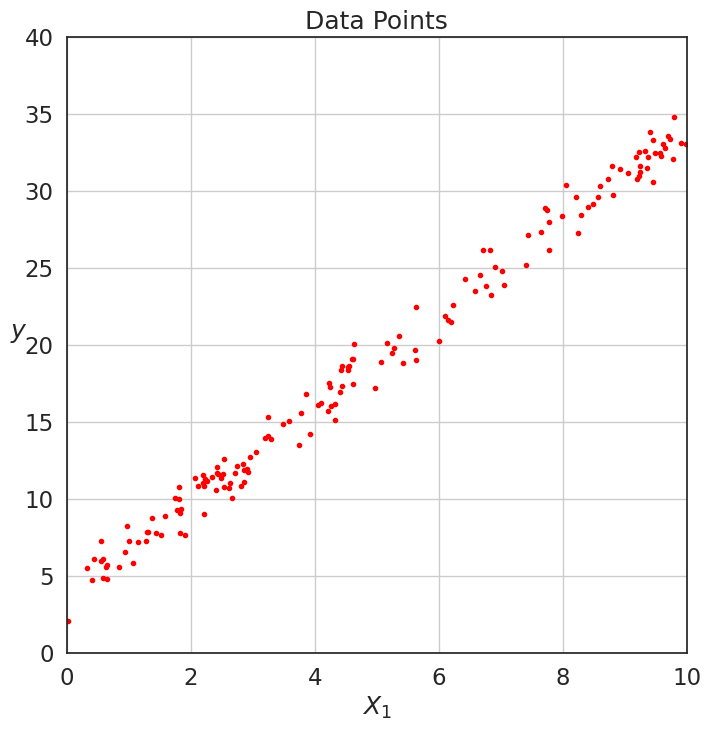

In [20]:
PlotData(X_train, Y_train)

In [21]:
# function to add dummy feature to our feature matrix

def add_dummy_feature(x):
    '''
    Adds dummy feature to the dataset.

        Args:
            x: Training dataset

        Returns:
            Training dataset with an addition of dummy feature

    '''
    return np.column_stack((np.ones(x.shape[0]), x))

In [22]:
# Let test the dummy feature adding function
# Testing

import unittest

class TestAddDummyFeature(unittest.TestCase):

    def test_add_dummy_feature(self):
        ''' Test case function for add_dummy_feature'''

        train_matrix = np.array([[3,2,5],[9,4,7]])
        train_matrix_with_dummy_feature = add_dummy_feature(train_matrix)

        #test the shape
        self.assertEqual(train_matrix_with_dummy_feature.shape, (2,4))

        # and contents
        np.testing.assert_array_equal(train_matrix_with_dummy_feature,np.array([[1,3,2,5],[1,9,4,7]]))

unittest.main(argv=[''], defaultTest='TestAddDummyFeature', verbosity=2, exit=False)

test_add_dummy_feature (__main__.TestAddDummyFeature)
Test case function for add_dummy_feature ... ok

----------------------------------------------------------------------
Ran 1 test in 0.006s

OK


In [23]:
# Let's add dummy feature to training set
print("Before adding dummy feature:\n", X_train[:5])
print("\n")

X_train_with_dummy = add_dummy_feature(X_train)

print("After adding dummy feature:\n", X_train_with_dummy[:5,:])

Before adding dummy feature:
 [0.57901281 5.42518875 3.28483157 2.20730319 1.82749989]


After adding dummy feature:
 [[1.         0.57901281]
 [1.         5.42518875]
 [1.         3.28483157]
 [1.         2.20730319]
 [1.         1.82749989]]


In [24]:
def predict(X,w):
    '''
    Prediction of ouotput label for a given input

    Args:
        X: Feature matrix of shape (n, m+1).
        w: weight vector of shape (m+1,)

    Returns:
        y: Predicted label vector of shape (n,)

    '''
    #check to make sure the feature matrix and weight vector have compatible shapes
    assert X.shape[-1] == w.shape[0], "X and w don't have compatible dimensions"
    return X @ w

In [25]:
# let's test the function
import unittest

class TestPredict(unittest.TestCase):

    def test_predict(self):
        '''Test case predict function of linear regression'''
        # Set up
        train_matrix = np.array([[1,3,2,5],[1,9,4,7]])
        weight_vector = np.array([1,1,1,1])
        expected_label_vector = np.array([11,21])

        #call
        predicted_label_vector = predict(train_matrix, weight_vector)

        #asserts
        #test the shape
        self.assertEqual(predicted_label_vector.shape, (2,))

        # and the contents
        np.testing.assert_array_equal(expected_label_vector, predicted_label_vector)

unittest.main(argv=[''], defaultTest='TestPredict', verbosity=2, exit=False)


test_predict (__main__.TestPredict)
Test case predict function of linear regression ... ok

----------------------------------------------------------------------
Ran 1 test in 0.012s

OK
